In [1]:
import numpy as np
import pandas as pd
import os
import json
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from plotting_utils import *

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
RESULTS_FILES = []
RESULTS_FILES += [
    f"hyperparam_search_test.{classifier_name}.{vlm_name}.csv"
    for classifier_name, vlm_name in itertools.product(
        ["CoopFewShotClassifier", "CoNaFewShotClassifier"],
        ["ClipVLM", "MILES_SimilarityVLM"] #, "VideoClipVLM"]
    )
]
RESULTS_FILES += [
    "test.vl_proto.csv"
]

results_dataframes = [pd.read_csv(file) for file in RESULTS_FILES]
results = combine_results(*results_dataframes)

6 Overall Lines
2 Separate Plots


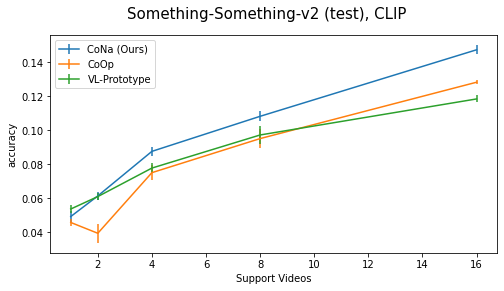

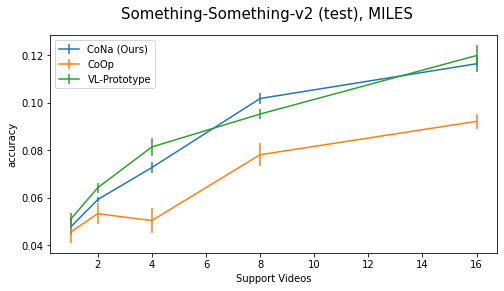

In [4]:
plot(
    results,
    x_col="n_support",
    y_col="accuracy",
    plot_descriptor_cols=["query_dataset", "vlm_class"],
    line_descriptor_cols=["classifier_class"],
    filter_dict={
        "n_support": [1,2,4,8,16],
        "query_dataset": ["smsm.v.test"],
        "vlm_class": ["ClipVLM", "MILES_SimilarityVLM"]
    },
    show_error_bars=True,
    savedir="result_plots"
)

In [5]:
display(results["classifier_class"])

0           CoopFewShotClassifier
1           CoopFewShotClassifier
2           CoopFewShotClassifier
3           CoopFewShotClassifier
4           CoopFewShotClassifier
                 ...             
95    HardPromptFewShotClassifier
96    HardPromptFewShotClassifier
97    HardPromptFewShotClassifier
98    HardPromptFewShotClassifier
99    HardPromptFewShotClassifier
Name: classifier_class, Length: 100, dtype: object